## Data Cleaning & Pre-processing
![data-cleaning-in-python](https://daxg39y63pxwu.cloudfront.net/images/blog/data-cleaning-in-python/data-cleaning-in-python.png)

First step of an analytics project is to clean the datasets and pre-processed it to make it suitable for use by analytical model and visualization


In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import seaborn as sb

## 1. Import dataset into the notebook

In [2]:
train_df = pd.read_csv('archive/aug_train.csv')

In [3]:
test_df = pd.read_csv('archive/aug_test.csv')

In [4]:
combined_df = pd.concat([test_df, train_df])
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21287 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20775 non-null  object 
 7   major_discipline        18647 non-null  object 
 8   experience              21217 non-null  object 
 9   company_size            14727 non-null  object 
 10  company_type            14513 non-null  object 
 11  last_new_job            20824 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
shuffled = combined_df.sample(frac=1, random_state=1).reset_index()

- combine train and test dataset and reshuffle 

In [6]:
shuffled.to_csv('archive/originalDataset.csv', index=False)



**About this dataset**
- `enrolle_id` : Candidate's unique ID (Identity Document)
- `city` : City code
- `city_development_index`: Development index of the city (scaled) (0.45: less developed to 0.95: highly developed)
- `gender`: Gender of a candidate
- `relevant_experience` : Relevant experience of a candidate
- `enrolled_university` : Type of University course enrolled if any
- `education_level` : Education level of candidate
- `major_discipline` : Education major discipline of candidate
    - STEM: Candidate's degree programme falls under the umbrella of Science, Technology, Engineering or Math
    - Humanities: Candidates who had interdisciplinary study of circumstances, Literature, English, Arts or History
    - Business Degree: Candidates who hold bachelor of business degree
    - Other: Candidates who hold other degrees apart from STEM, Humanities and Business. 
    - No Major: Candidates who do not have a degree
- `experience` : Candidate total experience in years
- `company_size` : Number of employees in current employer's company
- `company_type` : Type of current employer
    - Pvt Ltd: Private Limited company
    - Public Sector: Organisations that are owned and operated by the government
    - Funded Startup: A company that has received funding from investors like venture capitalists/angel investors
    - Early Stage Startup: Newly founded company that is in the early stages of development
    - NGO: Non-Government Organisation 
- `last_new_job` : Difference in years between previous job and current job
- `training_hours`: training hours completed
- `target`: 0 – Not looking for job change, 1 – Looking for a job change


<hr>

## 2. Format Data

In [7]:
shuffled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   21287 non-null  int64  
 1   enrollee_id             21287 non-null  int64  
 2   city                    21287 non-null  object 
 3   city_development_index  21287 non-null  float64
 4   gender                  16271 non-null  object 
 5   relevent_experience     21287 non-null  object 
 6   enrolled_university     20870 non-null  object 
 7   education_level         20775 non-null  object 
 8   major_discipline        18647 non-null  object 
 9   experience              21217 non-null  object 
 10  company_size            14727 non-null  object 
 11  company_type            14513 non-null  object 
 12  last_new_job            20824 non-null  object 
 13  training_hours          21287 non-null  int64  
 14  target                  19158 non-null

### 2.1 Drop irrelevant columns 
- index
- enrollee_id

In [8]:
shuffled = shuffled.drop(shuffled.loc[:, 'index':'city'].columns, axis=1)

In [9]:
shuffled.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.924,Male,Has relevent experience,Full time course,Primary School,NaN,11,NaN,NaN,1,8,0.0
1,0.804,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,50-99,NGO,1,57,0.0
2,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,11,50-99,Pvt Ltd,1,32,0.0
3,0.856,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,1,118,NaN
4,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Early Stage Startup,2,310,0.0


#### Identify Continuous Variables

In [10]:
continuous_var = shuffled.select_dtypes(include = ['int64','float64']).columns.values
continuous_var

array(['city_development_index', 'training_hours', 'target'], dtype=object)

#### Identify Categorical Variables

In [11]:
categorical_var = shuffled.select_dtypes(include = ['object']).columns.values
categorical_var

array(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience',
       'company_size', 'company_type', 'last_new_job'], dtype=object)

### 2.1 Format Categorical Variables 
**** give description here ****

In [12]:
shuffled['last_new_job'] = shuffled['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x) #capiatalising
shuffled.loc[shuffled['enrolled_university'] == 'no_enrollment', 'enrolled_university'] = 'No Enrollment'#capiatalising
shuffled['company_size'] = shuffled['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) #diff replacement method

shuffled['experience'] = shuffled['experience'].apply(lambda x: '0' if x == '<1' else x)
shuffled['experience'] = shuffled['experience'].apply(lambda x: '20' if x == '>20' else x)

In [13]:
ed_order = ['Primary School','High School','Graduate','Masters','Phd']
enroll_order = ['No Enrollment','Part time course','Full time course']
disc_order = ['STEM','Unknown','Humanities','Other','Business Degree','Arts','No Major']
exp_yrs_order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
exp_yrs_order_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
size_order = ['0','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
job_order = ['Never', '1', '2', '3', '4', '>4']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other','Not provided']
company_order = ['Pvt Ltd','Unknown','Funded Startup','Public Sector','Early Stage Startup','NGO','Other']

In [14]:
shuffled["target"].value_counts()

0.0    14469
1.0     4689
Name: target, dtype: int64

### 2.2 IntegerEncoding for Categorical Data

Map each categorical data values to integer values 
- facilitate further visualisation & analysis 
- facilitate future imputatoin 

In [15]:
shuffled_cor_df = shuffled.copy()

mapping = {
    'relevent_experience': {
        "Has relevent experience": 1,
        "No relevent experience": 0
    },
    'enrolled_university': {
        "Full time course": 2,
        "Part time course": 1,
        "No Enrollment": 0
    },
    'gender': {
        "Male": 3,
        "Female": 2,
        "Other": 1,
        "Not provided": 0
    },
    'education_level': {
        "Phd": 4,
        "Graduate": 3,
        "Masters": 2,
        "High School": 1,
        "Primary School": 0,
    },
    'last_new_job': {
        ">4": 5,
        "4": 4,
        "3": 3,
        "2": 2,
        "1": 1,
        "Never": 0
    },
    'company_type': {
        "Pvt Ltd": 6, 
        "Funded Startup": 5, 
        "Public Sector": 4, 
        "Early Stage Startup": 3, 
        "NGO": 2,
        "Other": 1,
        "Unknown": 0
    },
    'major_discipline': {
        "STEM": 5,
        "Humanities": 4, 
        "Business Degree": 3,
        "Arts": 2,
        "Other": 1,
        "No Major": 0
    },
    'company_size': {
                "0": 0,
              "<10": 1,
            "10-49": 2,
            "50-99": 3,
          "100-500": 4,
          "500-999": 5,
        "1000-4999": 6,
        "5000-9999": 7,
           "10000+": 8,
    }
}

for mapping_type in mapping:
    for val in mapping[mapping_type]:
        condition = shuffled_cor_df[mapping_type] == val
        shuffled_cor_df.loc[condition, mapping_type] = mapping[mapping_type][val]

    print(mapping_type, ':', shuffled_cor_df[mapping_type].unique())
        



relevent_experience : [1 0]
enrolled_university : [2 0 1 nan]
gender : [3 2 nan 1]
education_level : [0 3 2 4 1 nan]
last_new_job : [1 2 5 0 3 4 nan]
company_type : [nan 2 6 3 4 5 1]
major_discipline : [nan 5 0 4 2 1 3]
company_size : [nan 3 6 8 4 2 5 1 7]


In [16]:
shuffled_cor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  21287 non-null  float64
 1   gender                  16271 non-null  object 
 2   relevent_experience     21287 non-null  object 
 3   enrolled_university     20870 non-null  object 
 4   education_level         20775 non-null  object 
 5   major_discipline        18647 non-null  object 
 6   experience              21217 non-null  object 
 7   company_size            14727 non-null  object 
 8   company_type            14513 non-null  object 
 9   last_new_job            20824 non-null  object 
 10  training_hours          21287 non-null  int64  
 11  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.9+ MB


<hr> 

## 3. Handling Missing Value 

In [17]:
print('Number of NA entries: ', shuffled_cor_df.isna().sum().sum())

Number of NA entries:  24581


In [18]:
shuffled_cor_df.isnull().sum()

city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          2640
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                    2129
dtype: int64

In [19]:
shuffled_cor_df.isnull().sum()/len(shuffled_cor_df) ##finding percentage of missing values

city_development_index    0.000000
gender                    0.235637
relevent_experience       0.000000
enrolled_university       0.019589
education_level           0.024052
major_discipline          0.124019
experience                0.003288
company_size              0.308169
company_type              0.318222
last_new_job              0.021750
training_hours            0.000000
target                    0.100014
dtype: float64

In [20]:
#pip install missingno
import missingno as msno

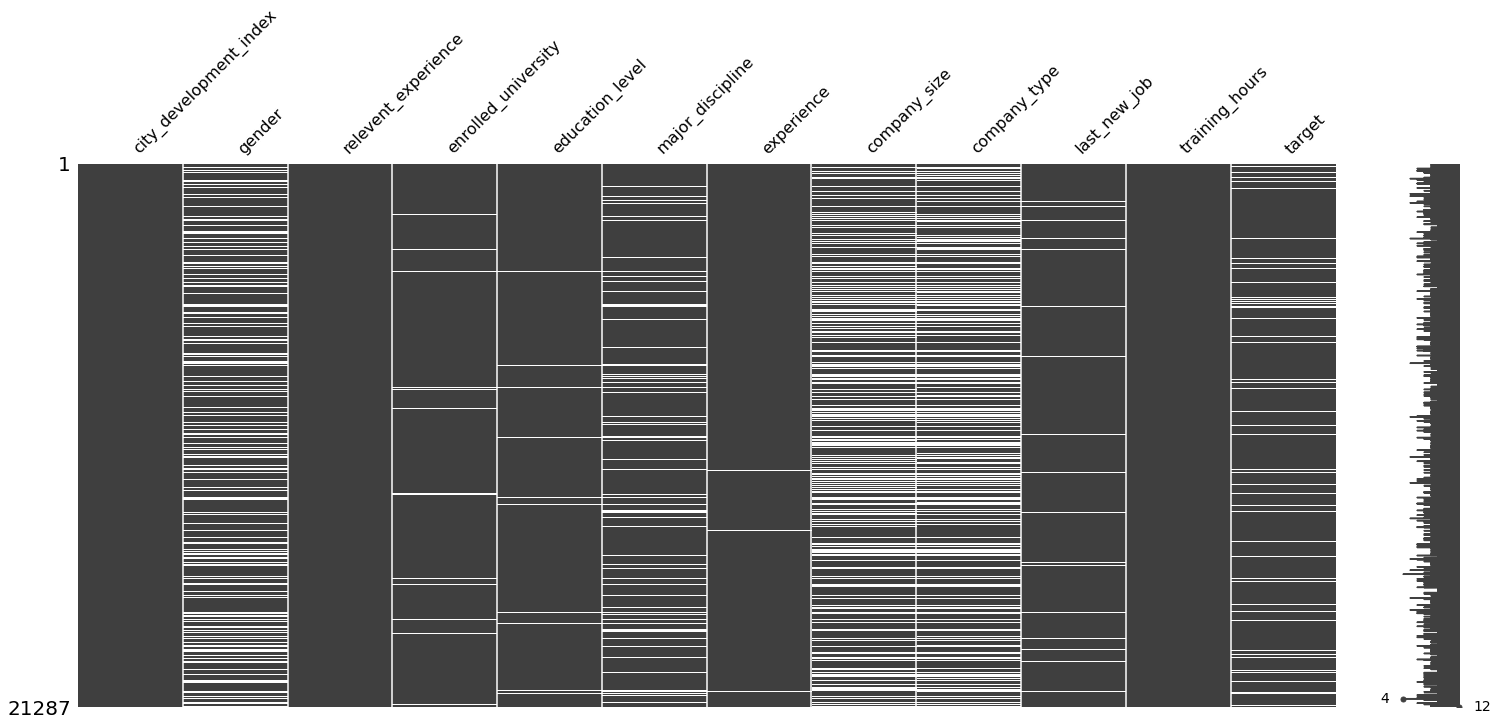

<Figure size 7200x2400 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
msno.matrix(shuffled)
plt.figure(figsize = (12,4), dpi = 600)
plt.show()

<AxesSubplot:>

<Figure size 1200x800 with 0 Axes>

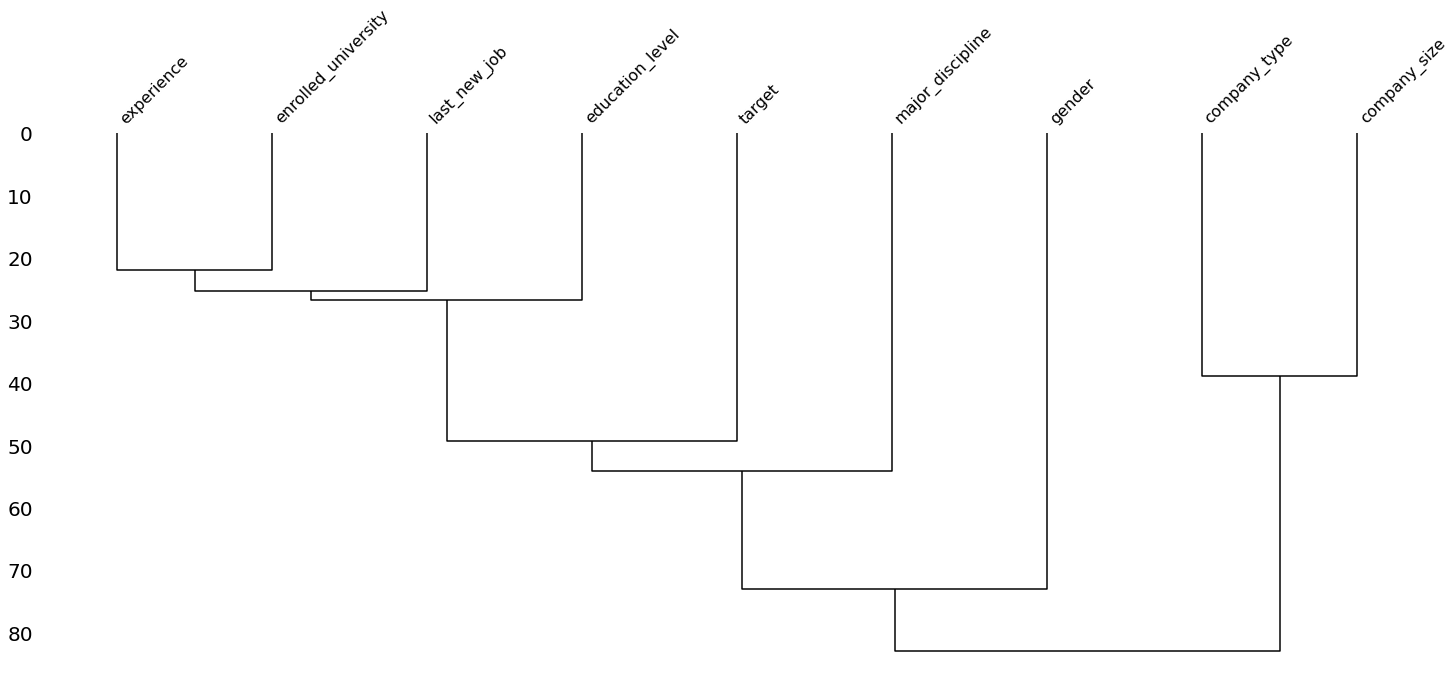

In [22]:
# Columns having missing values
missing_columns = [col for col in shuffled.columns if shuffled[col].isnull().sum() > 0]
plt.figure(dpi = 200)
msno.dendrogram(shuffled[missing_columns])

We interpret the dendrogram based on a top-down approach, i.e., to focus on the height at which any two columns are joined together with matters of nullity. More will be the height less will be the relation and vice versa is also True. 

For example if we see pair of attributes 'experience' and 'enrolled_university' value has height 0 implies they are highly correlated in case of nullity. 

<AxesSubplot:>

<Figure size 4500x2700 with 0 Axes>

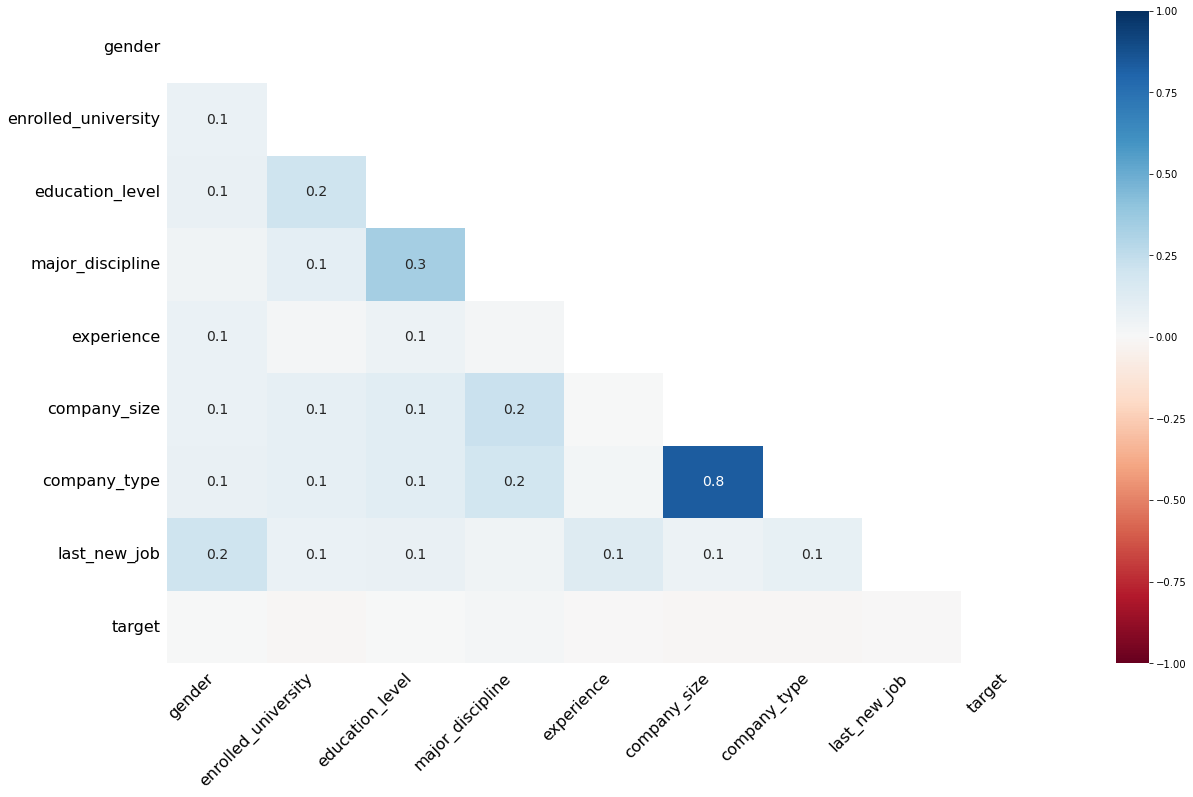

In [23]:
plt.figure(figsize = (15,9), dpi = 300)
msno.heatmap(shuffled, labels = True)

Correlation heatmap measures nullity correlation between columns of the dataset. It shows how strongly the presence or absence of one feature affects the other.

Nullity correlation ranges from(-1 to 1):
- -1 means if one column(attribute) is present, the other is almost certainly absent.
- 0 means there is no dependence between the columns(attributes).
- 1 means if one column(attributes) is present, the other is also certainly present.

Unlike in a familiar correlation heatmap, if you see here, many columns are missing. Those columns which are always full or always empty have no meaningful correlation and are removed from the visualization.

The heatmap is helpful for identifying data completeness correlations between attribute pairs, but it has the limited explanatory ability for broader relationships and no special support for really big datasets.

### Analyse the reasons behind related null values & Decide on Handling method


    
**1. Drop records with missing values**
 
 a) Predictor: `target`
    
    This is the predictor column that the analytics will try to predict it. Hence, the accuracy of this is significant and should not be imputed. Moreover, only 10% of records do not have the target data, hence, it is acceptable to drop them. 
   
   
    
**2. Impute missing data by other attributes**
    
   a) Education & Experience Information: `enrolled_university`, `education_level`, `major_discipline`, `experience` and `last_new_job`

    The education-related attributes in our dataset, such as education_level, major_discipline, and university_id, are assumed to be important in the research area of employment and should not be easily dropped from the dataset. These variables can provide valuable insights into the educational background of individuals and how it relates to their employment outcomes.
    
    Moreover, these attributes are likely to be highly correlated with each other and with other variables in the dataset. For example, we may observe that graduates from certain universities are more likely to pursue STEM disciplines or that individuals with higher levels of education are more likely to hold certain job titles or work in certain industries.

 
 
 **3. Treat missing data as a separate category**

   a) Current Employment: `company_size` and `company_type`
    
    These 2 attributes are highly nullity-correlated, indicating that there may be missing or unavailable data about the current employment status of the individuals in the dataset. However, this missing data can be interpreted as unknown and dealt with by the models that we use to analyze the data. 
    
    Moreover, it is important to note that 30% of the rows in the dataset have missing data in these 2 columns. Therefore, if we were to drop all these, we would be losing a significant amount of meaningful data records, which could potentially bias our analysis and lead to inaccurate conclusions.
    
   b) Personal Information: `Gender`
    
    The missing value might be due to the privacy consideration rather than abnomality. Hence, it is meaningful to classify null values as "Not provided".
    
    

 


### 3.1 Drop records with missing values

In [24]:
shuffled_cor_df.dropna(subset = ['target','experience', 'last_new_job'],inplace=True)
shuffled_cor_df.isna().sum()/len(shuffled)

city_development_index    0.000000
gender                    0.194015
relevent_experience       0.000000
enrolled_university       0.016395
education_level           0.019448
major_discipline          0.104665
experience                0.000000
company_size              0.268568
company_type              0.276131
last_new_job              0.000000
training_hours            0.000000
target                    0.000000
dtype: float64

### 3.2 Impute missing data by other attributes

In [25]:
shuffled_cor_df.reset_index(inplace = True,drop = True)

In [26]:
target_reg = shuffled_cor_df.iloc[:,-1].copy()

In [27]:
# Find the index value corresponding to the missing value 
nanlist = ['enrolled_university', 'education_level','major_discipline', 'company_size', 'company_type']

from sklearn.impute import SimpleImputer  # Packages for imputing missing values 
from sklearn.ensemble import RandomForestRegressor

for name in nanlist:

    # Construct new feature matrix and new labels
    df = shuffled_cor_df  
    fillc = df.loc[:, name]   # A column to be filled, with index i

    df = pd.concat([df.loc[:, df.columns != name], pd.DataFrame(target_reg)], axis=1)


    # The new feature matrix df is filled with zeros for the columns containing missing values
    # check whether have 0 pd.DataFrame(df_0).isnull().sum()
    df_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0).fit_transform(df)

    ytrain = fillc[fillc.notnull()]  # Non-null values in the selected filled feature matrix 
    ytest = fillc[fillc.isnull()]  # Null values in the selected filled feature matrix
    Xtrain = df_0[ytrain.index, :]  # On the new feature matrix, the records corresponding to the non-null values of the features selected to be filled
    Xtest = df_0[ytest.index, :]   # The record corresponding to the null value

    # Random forest fill with missing values
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(Xtrain, ytrain)
    y_predict = rfc.predict(Xtest)  # The result of the predict interface prediction is those values used to fill the null

    # Return the filled features to our original feature matrix
    shuffled_cor_df.loc[shuffled_cor_df.loc[:, name].isnull(), name] = y_predict
    

In [28]:
shuffled_cor_df[nanlist] = round(shuffled_cor_df[nanlist].astype(float))
shuffled_cor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18694 entries, 0 to 18693
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18694 non-null  float64
 1   gender                  14564 non-null  object 
 2   relevent_experience     18694 non-null  object 
 3   enrolled_university     18694 non-null  float64
 4   education_level         18694 non-null  float64
 5   major_discipline        18694 non-null  float64
 6   experience              18694 non-null  object 
 7   company_size            18694 non-null  float64
 8   company_type            18694 non-null  float64
 9   last_new_job            18694 non-null  object 
 10  training_hours          18694 non-null  int64  
 11  target                  18694 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


### 3.3 Treat missing data as a separate category

In [29]:
#shuffled_cor_df['company_size'].fillna('0',inplace=True)
#shuffled_cor_df['company_type'].fillna('0',inplace=True) #unknown
shuffled_cor_df['gender'].fillna('0',inplace=True) #not provided

In [30]:
#the dataset without missing values:
shuffled_cor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18694 entries, 0 to 18693
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18694 non-null  float64
 1   gender                  18694 non-null  object 
 2   relevent_experience     18694 non-null  object 
 3   enrolled_university     18694 non-null  float64
 4   education_level         18694 non-null  float64
 5   major_discipline        18694 non-null  float64
 6   experience              18694 non-null  object 
 7   company_size            18694 non-null  float64
 8   company_type            18694 non-null  float64
 9   last_new_job            18694 non-null  object 
 10  training_hours          18694 non-null  int64  
 11  target                  18694 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB


In [31]:
for mapping_type in mapping:
    for val in mapping[mapping_type]:
        condition = shuffled_cor_df[mapping_type] == val
        shuffled_cor_df.loc[condition, mapping_type] = mapping[mapping_type][val]

    print(mapping_type, ':', shuffled_cor_df[mapping_type].unique())

relevent_experience : [1 0]
enrolled_university : [2. 0. 1.]
gender : [3 2 '0' 1]
education_level : [0. 3. 2. 4. 1.]
last_new_job : [1 2 5 0 3 4]
company_type : [5. 2. 6. 3. 4. 1.]
major_discipline : [5. 4. 0. 2. 1. 3.]
company_size : [3. 5. 6. 8. 4. 2. 1. 7.]


<hr>

## 4. Data Clean (Outlier detection & multicollinearity exploration)

- Filter out outliers using confidential interval (95%)

#### Only values that are valid in the confidential 95% interval were kept. The remaining values, considered as outliers were removed for both city_development_index and training_hours.

### **4.1 Cleaning up continuous variables**
- city_development_index
- training_hours

In [32]:
# confidence interval: (µ - 3σ, µ + 3σ)
conf_interval = np.mean(shuffled_cor_df['city_development_index'])-3*np.std(shuffled_cor_df['city_development_index']),np.mean(shuffled_cor_df['city_development_index'])+3*np.std(shuffled_cor_df['city_development_index'])
print('Confidence Interval:', conf_interval)

Confidence Interval: (0.35967959187462467, 1.2321186321544817)


In [33]:
numofRowsBefore = len(shuffled_cor_df)
print('Number of rows before removing outliers:', numofRowsBefore)

(lower, upper) = conf_interval
shuffled_cor_df.drop(shuffled_cor_df[shuffled_cor_df['city_development_index'] < lower].index, inplace=True)
shuffled_cor_df.drop(shuffled_cor_df[shuffled_cor_df['city_development_index'] > upper].index, inplace=True)

numofRowsAfter = len(shuffled_cor_df)
print('Number of rows after removing outliers:', numofRowsAfter)
print('Number of rows dropped:', numofRowsBefore-numofRowsAfter)

Number of rows before removing outliers: 18694
Number of rows after removing outliers: 18694
Number of rows dropped: 0


In [34]:
shuffled_cor_df['training_hours'].describe()

count    18694.000000
mean        65.471488
std         60.100561
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

In [35]:
# confidence interval: (µ - 3σ, µ + 3σ)
conf_interval = np.mean(shuffled_cor_df['training_hours'])-3*np.std(shuffled_cor_df['training_hours']),np.mean(shuffled_cor_df['training_hours'])+3*np.std(shuffled_cor_df['training_hours'])
print('Confidence Interval:', conf_interval)

Confidence Interval: (-114.82537345402996, 245.76834981008005)


In [36]:
numofRowsBefore = len(shuffled)
print('Number of rows before removing outliers:', numofRowsBefore)

(lower, upper) = conf_interval
shuffled_cor_df.drop(shuffled_cor_df[shuffled_cor_df['training_hours'] < lower].index, inplace=True)
shuffled_cor_df.drop(shuffled_cor_df[shuffled_cor_df['training_hours'] > upper].index, inplace=True)

numofRowsAfter = len(shuffled)
print('Number of rows after removing outliers:', numofRowsAfter)
print('Number of rows dropped:', numofRowsBefore-numofRowsAfter)

Number of rows before removing outliers: 21287
Number of rows after removing outliers: 21287
Number of rows dropped: 0


**No outliers in continuous columns, hence, no record is dropped**

### **4.2 Cleaning up categorical variables**

- are the categorical variables consistent in their values?
- are there unreasonable value (text?)

In [37]:
for feature in shuffled.columns:
  if np.dtype(shuffled_cor_df[feature]) != 'object':
    continue
  print(shuffled_cor_df[feature].value_counts(), end='\n\n')

3    12837
0     4024
2     1208
1      184
Name: gender, dtype: int64

1    13219
0     5034
Name: relevent_experience, dtype: int64

20    2854
5     1390
4     1344
3     1285
6     1191
2     1091
7     1014
10     975
9      956
8      791
15     694
11     676
14     590
1      535
12     502
16     500
0      474
13     407
17     368
19     311
18     305
Name: experience, dtype: int64

1    7820
5    3220
2    2821
0    2388
4    1005
3     999
Name: last_new_job, dtype: int64



- all the categorical variables are consistent in their values

Therefore, no data cleaning is needed for categorical variables. However, one hot encoding is needed for categorical variables to encode them into numeric forms to allow analytical models to operate on these categorical variables, since not all values are ordinal variables

### 4.3 Multicollinearity Exploration

In [38]:
cor_matrix = shuffled_cor_df.copy()
cor_matrix = cor_matrix.astype(float)

<AxesSubplot:>

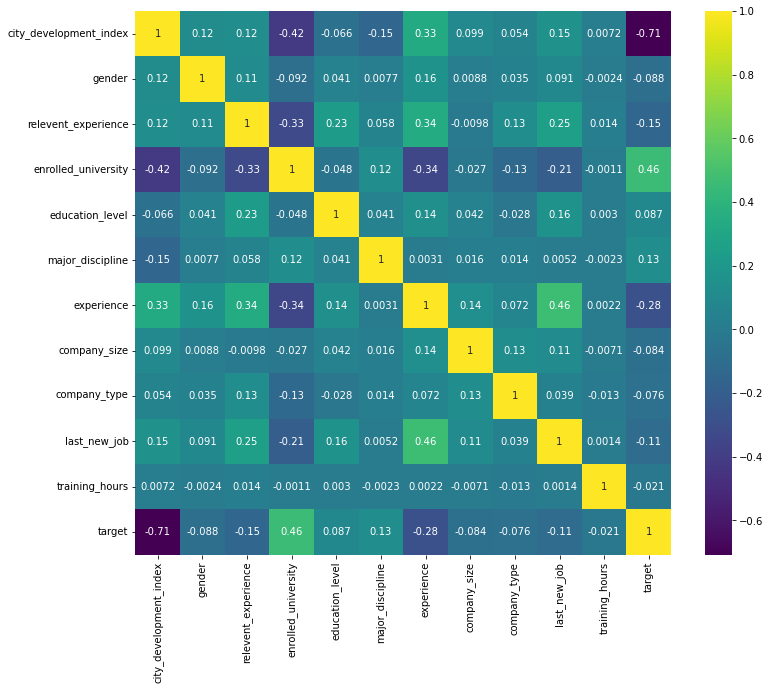

In [39]:
plt.figure(figsize = (12,10))
sb.heatmap(cor_matrix.corr(), annot = True, cmap = 'viridis')

- There is no multicollinearity concern among the attributes 

## 5. One-hot encoding & Text-Mapping
- one-hot: Prepare data for modelling
- text-mapping: provide higher readability

The `shuffled_cor_df` dataset contains 10 categorical predictor variables which do not have ordinal meaning:
- gender
- city
- major_discipline
- company_type

In [40]:
shuffled_cor_df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.924,3,1,2.0,0.0,5.0,11,3.0,5.0,1,8,0.0
1,0.804,3,1,0.0,3.0,5.0,17,3.0,2.0,1,57,0.0
2,0.920,3,1,0.0,3.0,5.0,11,3.0,6.0,1,32,0.0
4,0.920,3,1,2.0,3.0,5.0,9,5.0,5.0,1,168,0.0
5,0.893,3,0,0.0,2.0,5.0,20,6.0,6.0,2,47,0.0


### 5.1 Text-mapping


In [41]:
shuffled_cor_text_df = shuffled_cor_df.copy()

In [42]:
mapping = {
    'target': {
       "Yes": 1,
        "No": 0
    },
    'relevent_experience': {
        1: "Has relevent experience",
        0: "No relevent experience"
    },
    'enrolled_university': {
        2: "Full time course",
        1: "Part time course",
        0: "No Enrollment"
    },
    'gender': {
        3: "Male",
        2: "Female",
        1: "Other",
        "0": "Not provided"
    },
    'education_level': {
        4: "Phd",
        3: "Graduate",
        2: "Masters",
        1: "High School",
        0: "Primary School",
    },
    'company_type': {
        6: "Pvt Ltd", 
        5: "Funded Startup", 
        4: "Public Sector", 
        3: "Early Stage Startup", 
        2: "NGO",
        1: "Other",
        "0": "Unknown"
    },
    'major_discipline': {
        5: "STEM",
        4: "Humanities", 
        3: "Business Degree",
        2: "Arts",
        1: "Other",
        0: "No Major"
    }
}



for mapping_type in mapping:
    for val in mapping[mapping_type]:
        condition = shuffled_cor_text_df[mapping_type] == val
        shuffled_cor_text_df.loc[condition, mapping_type] = mapping[mapping_type][val]

    print(mapping_type, ':', shuffled_cor_text_df[mapping_type].unique())


target : [0. 1.]
relevent_experience : ['Has relevent experience' 'No relevent experience']
enrolled_university : ['Full time course' 'No Enrollment' 'Part time course']
gender : ['Male' 'Not provided' 'Female' 'Other']
education_level : ['Primary School' 'Graduate' 'Masters' 'Phd' 'High School']
company_type : ['Funded Startup' 'NGO' 'Pvt Ltd' 'Public Sector' 'Early Stage Startup'
 'Other']
major_discipline : ['STEM' 'Humanities' 'No Major' 'Arts' 'Other' 'Business Degree']


In [43]:
shuffled_cor_text_df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.924,Male,Has relevent experience,Full time course,Primary School,STEM,11,3.0,Funded Startup,1,8,0.0
1,0.804,Male,Has relevent experience,No Enrollment,Graduate,STEM,17,3.0,NGO,1,57,0.0
2,0.920,Male,Has relevent experience,No Enrollment,Graduate,STEM,11,3.0,Pvt Ltd,1,32,0.0
4,0.920,Male,Has relevent experience,Full time course,Graduate,STEM,9,5.0,Funded Startup,1,168,0.0
5,0.893,Male,No relevent experience,No Enrollment,Masters,STEM,20,6.0,Pvt Ltd,2,47,0.0


**Export encoded `shuffled_cor_text_df` dataframe as csv**

In [44]:
shuffled_cor_text_df.to_csv('archive/shuffled_text.csv', index=False)

### 5.2 One-hot encoding


In [45]:
# Import the OneHotEncoder from sklearn

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors

cat_variables = ['gender', 'major_discipline']

shuffled_cat = shuffled_cor_text_df[cat_variables]

ohe.fit(shuffled_cat)
shuffled_cat_ohe = pd.DataFrame(
    ohe.transform(shuffled_cat).toarray(),
    columns=ohe.get_feature_names_out(shuffled_cat.columns))

#Check the encoded variables
shuffled_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18253 entries, 0 to 18252
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender_Female                     18253 non-null  float64
 1   gender_Male                       18253 non-null  float64
 2   gender_Not provided               18253 non-null  float64
 3   gender_Other                      18253 non-null  float64
 4   major_discipline_Arts             18253 non-null  float64
 5   major_discipline_Business Degree  18253 non-null  float64
 6   major_discipline_Humanities       18253 non-null  float64
 7   major_discipline_No Major         18253 non-null  float64
 8   major_discipline_Other            18253 non-null  float64
 9   major_discipline_STEM             18253 non-null  float64
dtypes: float64(10)
memory usage: 1.4 MB


In [46]:
shuffled_cat

,gender,major_discipline
0,Male,STEM
1,Male,STEM
2,Male,STEM
4,Male,STEM
5,Male,STEM
...,...,...
18689,Male,STEM
18690,Male,Business Degree
18691,Male,Other
18692,Not provided,Humanities


In [47]:
shuffled_cat_ohe

,gender_Female,gender_Male,gender_Not provided,gender_Other,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
18248,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18249,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18250,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18251,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Combine encoded dataframe with continuous variables**

In [48]:
num_variable = []
for i in shuffled_cor_df:
    if i not in cat_variables:
        num_variable.append(i)
num_variable

['city_development_index',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

In [49]:
# Combining Numeric features with the OHE Categorical features
shuffled_num = shuffled_cor_df[num_variable]
shuffled_cat_ohe
shuffled_cat_ohe_df = pd.concat(
    [shuffled_num.reset_index(drop=True), shuffled_cat_ohe.reset_index(drop=True)],
    sort=False,
    axis=1)

# Check the final dataframe
shuffled_cat_ohe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18253 entries, 0 to 18252
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   city_development_index            18253 non-null  float64
 1   relevent_experience               18253 non-null  object 
 2   enrolled_university               18253 non-null  float64
 3   education_level                   18253 non-null  float64
 4   experience                        18253 non-null  object 
 5   company_size                      18253 non-null  float64
 6   company_type                      18253 non-null  float64
 7   last_new_job                      18253 non-null  object 
 8   training_hours                    18253 non-null  int64  
 9   target                            18253 non-null  float64
 10  gender_Female                     18253 non-null  float64
 11  gender_Male                       18253 non-null  float64
 12  gend

**Export encoded `shuffled_cat_ohe_df` dataframe as csv**

In [50]:
shuffled_cat_ohe_df.to_csv('archive/shuffled_encoded.csv', index=False)

---

#### Dataset created from this notebook:

    .
    ├── originalDataset.csv       # original dataset
    |   ├── shuffled_correlation.csv    # for EDA and visualization (encoded)
    |   └── shuffled_text.csv           # for EDA and visualization (text)
    |   └── shuffled_encoded.csv        # for analytical models (OneHotEncoding done)
    └──|

 